# Ising Model Simulation of a Ferromagnet
This notebook simulates the 2D Ising model of a ferromagnet using the Metropolis algorithm.
We visualize the spin configurations and monitor the magnetization over Monte Carlo steps.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline


## Initialize Lattice and Parameters

In [4]:
# Parameters
L = 50              # Lattice size (LxL)
T = 2.5             # Temperature
n_steps = 1000      # Number of Monte Carlo steps
J = 1.0             # Interaction energy
k_B = 1.0           # Boltzmann constant

# Initialize lattice with random spins (+1 or -1)
np.random.seed(42)
lattice = np.random.choice([-1, 1], size=(L, L))


## Metropolis Update Function

In [5]:
def metropolis_step(lattice, beta):
    for _ in range(L * L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        s = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                    lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * s * neighbors
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1
    return lattice


## Run Simulation

In [6]:
beta = 1 / (k_B * T)
magnetization = []

for step in range(n_steps):
    lattice = metropolis_step(lattice, beta)
    if step % 10 == 0:
        m = np.abs(np.sum(lattice)) / (L * L)
        magnetization.append(m)


## Plot Magnetization vs Steps

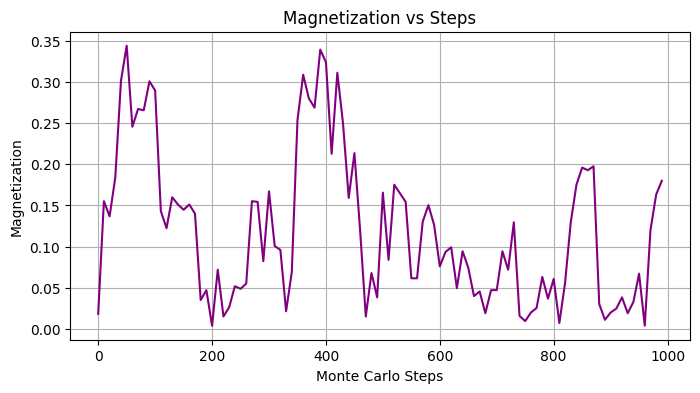

In [7]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0, n_steps, 10), magnetization, color='purple')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Steps')
plt.grid(True)
plt.show()


## Show Final Spin Configuration

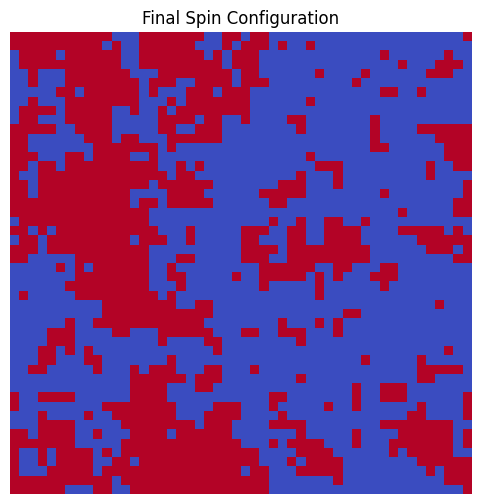

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(lattice, cmap='coolwarm')
plt.title('Final Spin Configuration')
plt.axis('off')
plt.show()
